<a href="https://colab.research.google.com/github/Sowmya053/SCT_ML_3/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
import pandas as pd

df = pd.read_csv('/content/Train.csv')
print(df.head())



   File_Name  Category
0  10846.jpg         1
1   2360.jpg         1
2  17531.jpg         0
3  13254.jpg         1
4  15554.jpg         0


In [ ]:
import os
import pandas as pd
import cv2
import numpy as np

# Load CSV
df = pd.read_csv('/content/Train.csv')

# Set image directory path
image_dir = '/content/PetImages'  # Make sure this exists!

# Initialize variables
data = []
labels = []
image_size = 64

# Read images and labels
for idx, row in df.iterrows():
    try:
        img_path = os.path.join(image_dir, row['File_Name'])
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (image_size, image_size))

        data.append(img.flatten())
        labels.append(row['Category'])  # 0=Cat, 1=Dog
    except Exception as e:
        continue

data = np.array(data)
labels = np.array(labels)


In [ ]:
print("Total images loaded:", len(data))


Total images loaded: 3


In [ ]:
import os
os.makedirs('/content/PetImages', exist_ok=True)
print("✅ Folder 'PetImages' created!")


✅ Folder 'PetImages' created!


In [ ]:
from google.colab import files
uploaded = files.upload()  # ← This opens a file picker


Saving 13500.jpg to 13500.jpg


In [ ]:
import shutil

# Move uploaded files into /content/PetImages
for filename in uploaded.keys():
    shutil.move(filename, os.path.join("/content/PetImages", filename))

print("✅ Images moved to PetImages folder")


✅ Images moved to PetImages folder


In [ ]:
import os
print(os.listdir('/content/PetImages')[:5])  # Show 5 uploaded images


['13500.jpg', '10846.jpg', '13254.jpg', '17531.jpg']


In [ ]:
image_dir = '/content/PetImages'


In [ ]:
import pandas as pd
df = pd.read_csv('/content/Train.csv')
print(df.head())


   File_Name  Category
0  10846.jpg         1
1   2360.jpg         1
2  17531.jpg         0
3  13254.jpg         1
4  15554.jpg         0


In [ ]:
import os

# Keep only rows where the image file exists
df = df[df['File_Name'].apply(lambda x: os.path.exists(os.path.join(image_dir, x)))].reset_index(drop=True)
print("✅ Total valid images found:", len(df))


✅ Total valid images found: 3


In [ ]:
import cv2
import numpy as np

data = []
labels = []
image_size = 64
missing_count = 0

for idx, row in df.iterrows():
    try:
        img_path = os.path.join(image_dir, row['File_Name'])
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            missing_count += 1
            continue

        img = cv2.resize(img, (image_size, image_size))
        data.append(img.flatten())
        labels.append(row['Category'])
    except Exception as e:
        continue

print(f"✅ Total images loaded: {len(data)}")
print(f"🚫 Total missing/broken images skipped: {missing_count}")


✅ Total images loaded: 3
🚫 Total missing/broken images skipped: 0


In [ ]:
data = np.array(data)
labels = np.array(labels)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

model = SVC(kernel='linear')
model.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


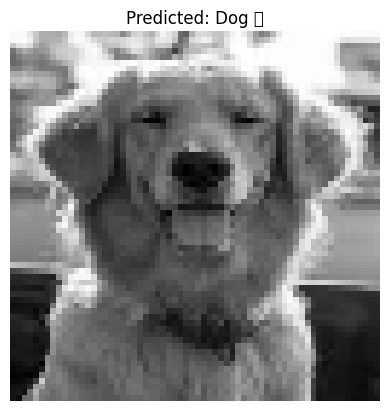

In [ ]:
import matplotlib.pyplot as plt

# Show up to 5 test samples, or less if there aren't that many
num_images = min(5, len(X_test))

for i in range(num_images):
    img = X_test[i].reshape(image_size, image_size)
    plt.imshow(img, cmap='gray')
    plt.title("Predicted: " + ("Dog 🐶" if y_pred[i] else "Cat 🐱"))
    plt.axis('off')
    plt.show()
